Top Constituencies by Margin of Victory:
       Constituency      Winning Candidate   Margin
888      INDORE(26)        SHANKAR LALWANI  1175092
126      Dhubri (2)        RAKIBUL HUSSAIN  1012476
140      Dhubri (2)        RAKIBUL HUSSAIN  1012476
154      Dhubri (2)        RAKIBUL HUSSAIN  1012476
112      Dhubri (2)        RAKIBUL HUSSAIN  1012476
880     VIDISHA(18)  SHIVRAJ SINGH CHOUHAN   821408
533     Navsari(25)              C R PATIL   773551
559     Navsari(25)              C R PATIL   773551
540  Gandhinagar(6)              AMIT SHAH   744716
514  Gandhinagar(6)              AMIT SHAH   744716


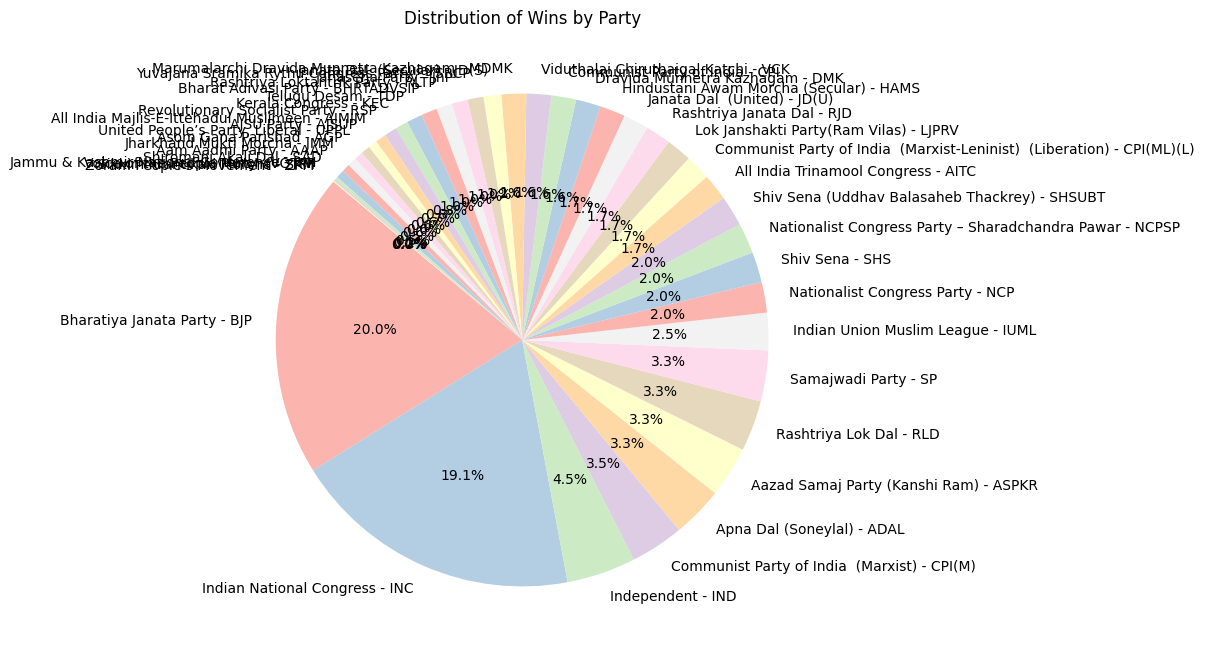

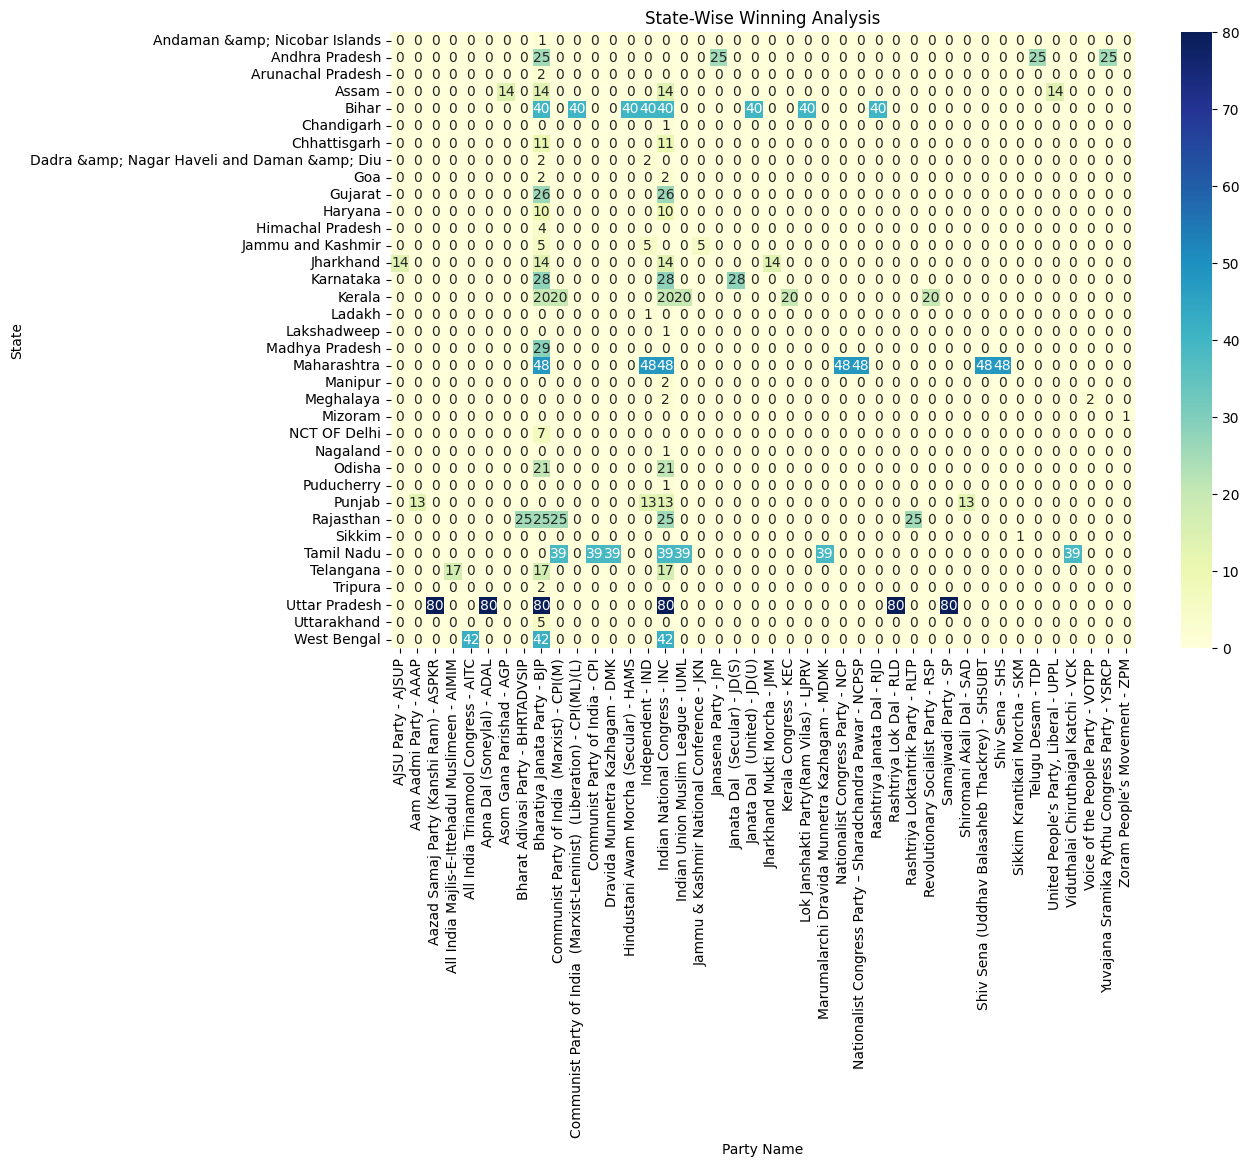

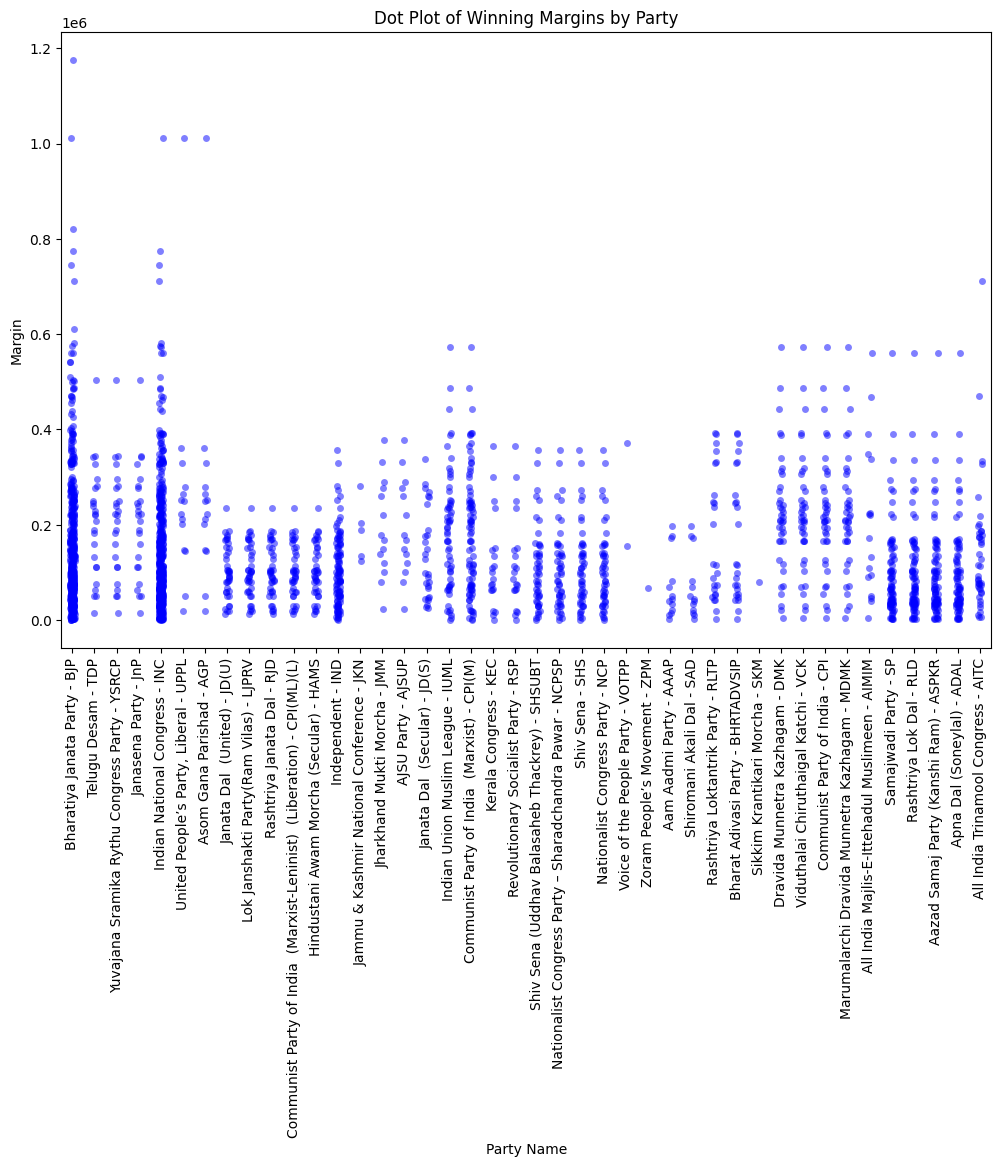

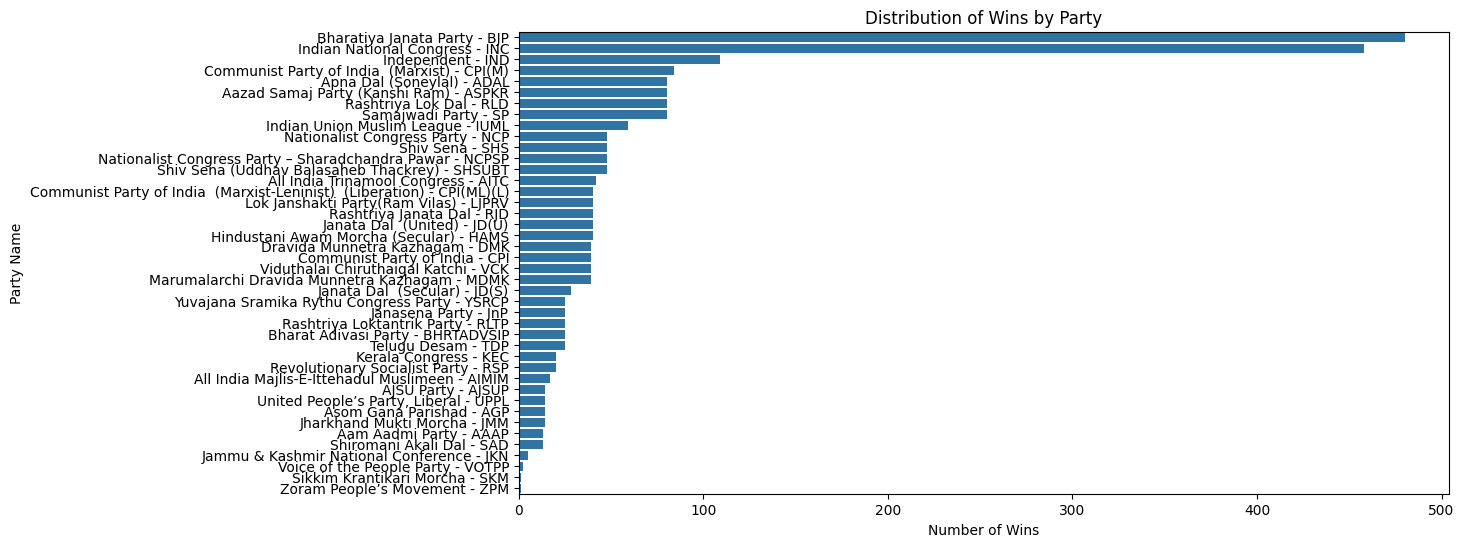

Top Candidates by Votes Received:
         Winning Candidate  Total Votes
154        RAKIBUL HUSSAIN      1471885
112        RAKIBUL HUSSAIN      1471885
140        RAKIBUL HUSSAIN      1471885
126        RAKIBUL HUSSAIN      1471885
888        SHANKAR LALWANI      1226751
880  SHIVRAJ SINGH CHOUHAN      1116460
725       DR C N MANJUNATH      1079002
697       DR C N MANJUNATH      1079002
669       DR C N MANJUNATH      1079002
486      BRIJMOHAN AGRAWAL      1050351


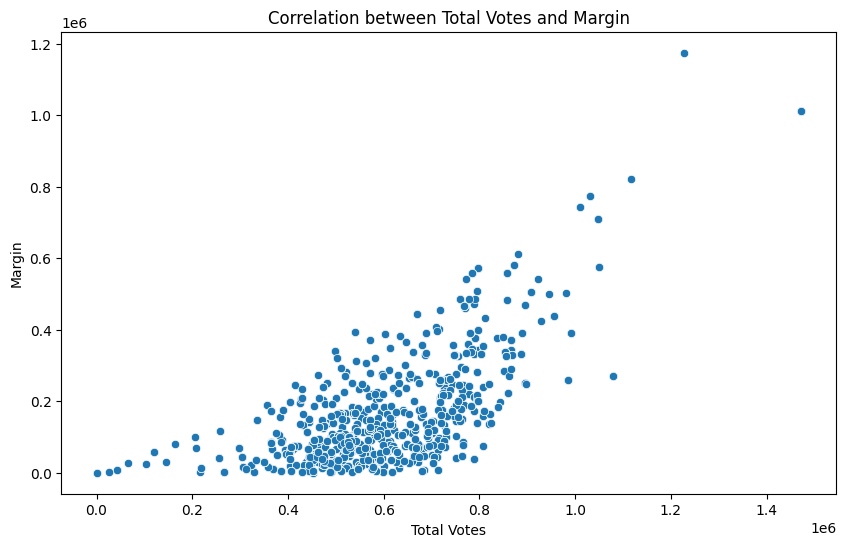

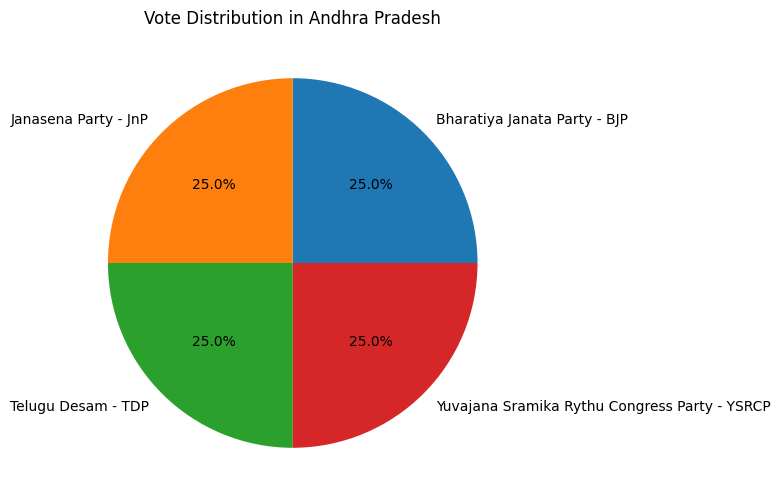

Party Performance Overview:
                                                      Total Votes            \
                                                             mean    median   
Party Name                                                                    
AJSU Party - AJSUP                                  627938.214286  633992.0   
Aam Aadmi Party - AAAP                              330503.461538  322224.0   
Aazad Samaj Party (Kanshi Ram) - ASPKR              530160.637500  509925.5   
All India Majlis-E-Ittehadul Muslimeen - AIMIM      618061.000000  585116.0   
All India Trinamool Congress - AITC                 686933.166667  698753.0   
Apna Dal (Soneylal) - ADAL                          530160.637500  509925.5   
Asom Gana Parishad - AGP                            763337.214286  763779.5   
Bharat Adivasi Party - BHRTADVSIP                   709436.480000  728211.0   
Bharatiya Janata Party - BJP                        621654.179167  608589.0   
Communist Party of India

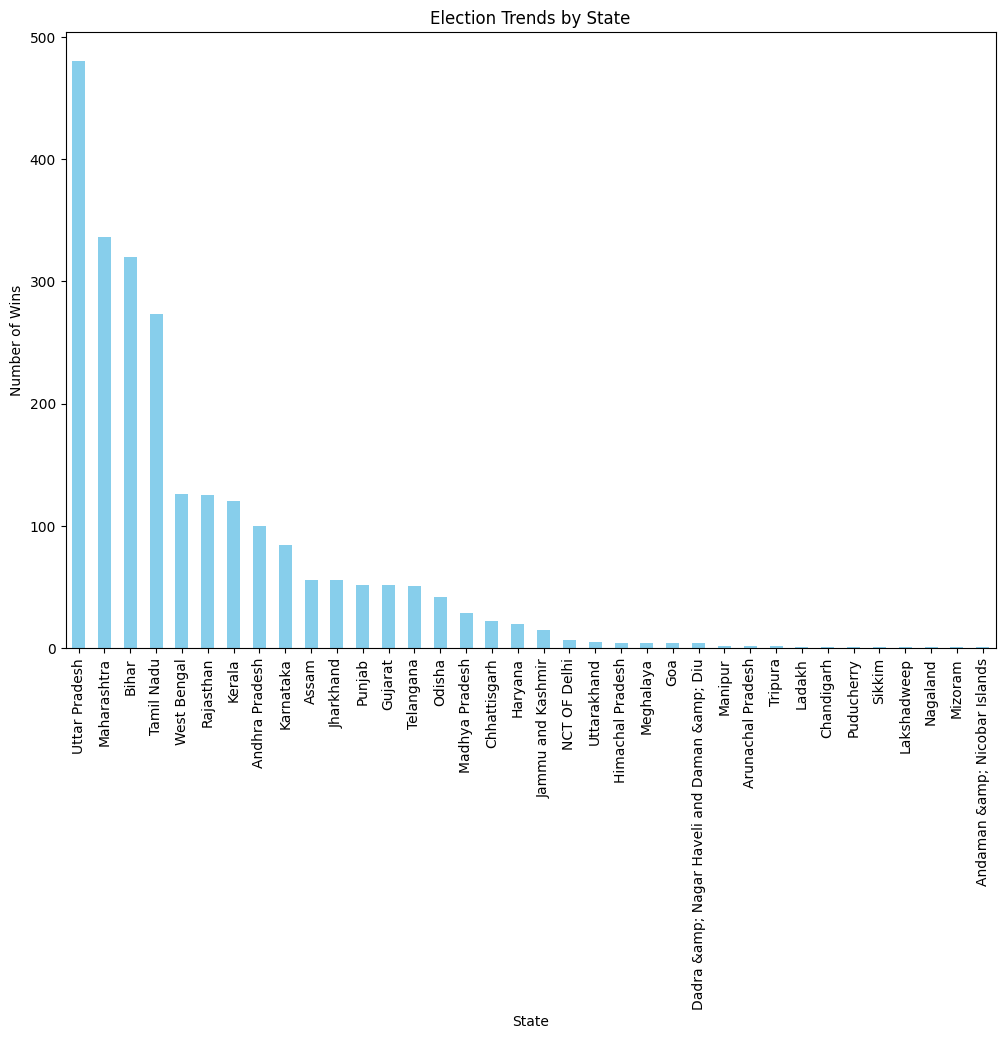

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('election_data.csv')

data['Total Votes'] = pd.to_numeric(data['Total Votes'].str.replace(',', ''), errors='coerce')
data['Margin'] = pd.to_numeric(data['Margin'].str.replace(',', ''), errors='coerce')
data.fillna(0, inplace=True)  
data['Total Votes'] = data['Total Votes'].astype(int)
data['Margin'] = data['Margin'].astype(int)
data.drop(columns=['Unnamed: 0'], inplace=True) 

top_margins = data.sort_values(by='Margin', ascending=False).head(10)
print("Top Constituencies by Margin of Victory:")
print(top_margins[['Constituency', 'Winning Candidate', 'Margin']])

party_wins = data['Party Name'].value_counts()
plt.figure(figsize=(10, 8))
party_wins.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Wins by Party')
plt.ylabel('')  
plt.show()

state_wins = data.groupby(['State', 'Party Name']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(state_wins, annot=True, cmap="YlGnBu", fmt="d")
plt.title('State-Wise Winning Analysis')
plt.ylabel('State')
plt.xlabel('Party Name')
plt.show()

plt.figure(figsize=(12, 8))
sns.stripplot(x='Party Name', y='Margin', data=data, jitter=True, size=5, color='blue', alpha=0.5)
plt.xticks(rotation=90)
plt.title('Dot Plot of Winning Margins by Party')
plt.xlabel('Party Name')
plt.ylabel('Margin')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Party Name', order=data['Party Name'].value_counts().index)
plt.title('Distribution of Wins by Party')
plt.xlabel('Number of Wins')
plt.ylabel('Party Name')
plt.show()

top_candidates = data.sort_values(by='Total Votes', ascending=False).head(10)
print("Top Candidates by Votes Received:")
print(top_candidates[['Winning Candidate', 'Total Votes']])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Votes', y='Margin', data=data)
plt.title('Correlation between Total Votes and Margin')
plt.xlabel('Total Votes')
plt.ylabel('Margin')
plt.show()

andhra_data = data[data['State'] == 'Andhra Pradesh']
vote_shares = andhra_data.groupby('Party Name')['Total Votes'].sum()
plt.figure(figsize=(10, 6))
vote_shares.plot(kind='pie', autopct='%1.1f%%')
plt.title('Vote Distribution in Andhra Pradesh')
plt.ylabel('')  
plt.show()

party_performance = data.groupby('Party Name')[['Total Votes', 'Margin']].agg(['mean', 'median', 'sum'])
print("Party Performance Overview:")
print(party_performance)

state_trends = data.groupby('State').size().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
state_trends.plot(kind='bar', color='skyblue')
plt.title('Election Trends by State')
plt.xlabel('State')
plt.ylabel('Number of Wins')
plt.show()